In [118]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec
import scipy.stats as stats
from matplotlib import rc
from obspy.imaging.beachball import beach
import pandas as pd
from glob import glob
from scipy import special as special
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

In [163]:
stressparams = pd.read_csv('stress_params.txt', delimiter= ',')
rakes = np.array(np.loadtxt('rakes_1.txt', delimiter= ','))
distributed_dips = np.array(pd.read_csv('VM_analysis_SS2_du20.txt', header=None))
    

rakes_np_1_idx = np.where(rakes[:, 2] == 1)[0]
rakes_np_2_idx = np.where(rakes[:, 2] == 2)[0]


stressparams = np.asarray(stressparams)

In [164]:
Delta = stressparams[:, 0]
R = stressparams[:, 1]

phi_MCS = stressparams[:, 2]
theta_MCS = stressparams[:, 3]
rho_MCS = stressparams[:, 4]

phimcs = stressparams[:, 5]
thetamcs = stressparams[:, 6]

phiics = stressparams[:, 7]
thetaics = stressparams[:, 8]

philcs = stressparams[:, 9]
thetalcs = stressparams[:, 10]

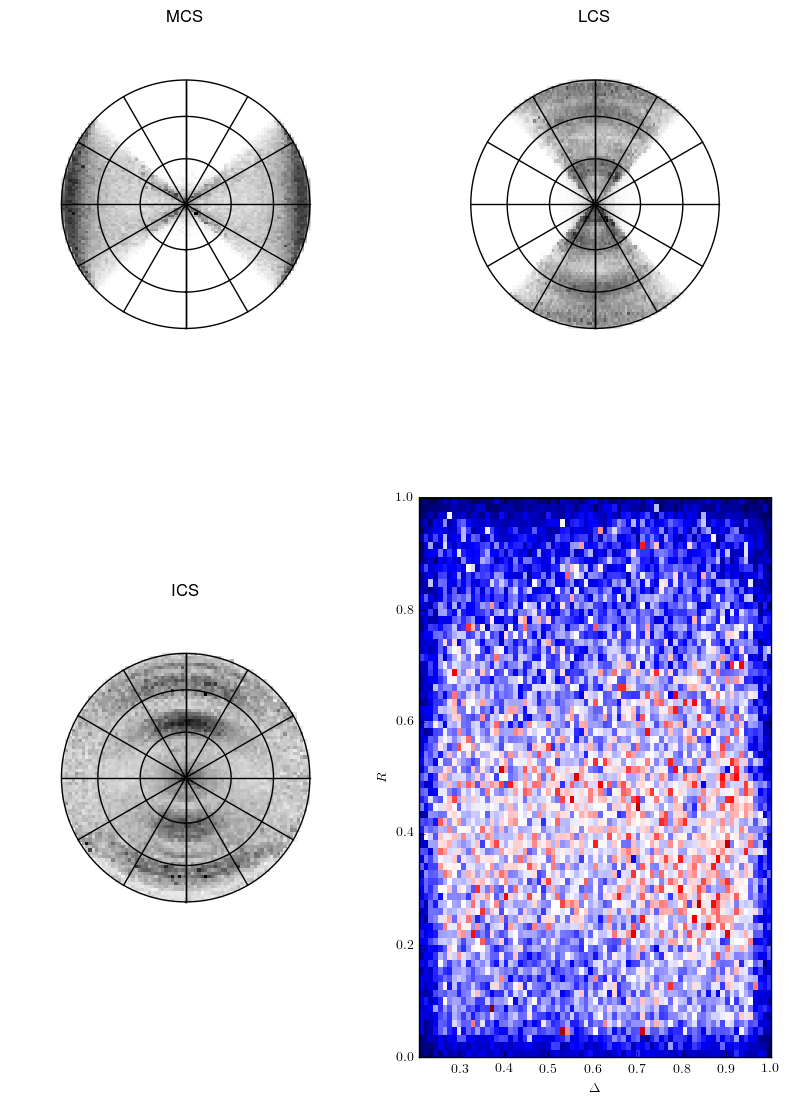

In [165]:
gs = gridspec.GridSpec(2, 3)

r1 = np.sqrt(2)
r2 = 1
r3 = 1/(np.sqrt(2+np.sqrt(3)))

x = np.linspace(-np.pi, np.pi, 1000)
theta = np.array([0, np.pi/6, np.pi/3, np.pi/2])
x_lines = r1*np.cos(theta)
y_lines = r1*np.sin(theta)

binsize = 75

plt.figure(figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

ax = plt.subplot(gs[0, 0])

ax.hist2d(phimcs, thetamcs, bins = binsize, cmap= "binary", zorder = 0)

ax.plot([-x_lines[0], x_lines[0]], [y_lines[0], y_lines[0]], lw=1, color='k', zorder = 10)
ax.plot([-x_lines[1], x_lines[1]], [-y_lines[1], y_lines[1]], lw=1, color='k', zorder = 10)
ax.plot([-x_lines[2], x_lines[2]], [-y_lines[2], y_lines[2]], lw=1, color='k', zorder = 10)
ax.plot([-x_lines[3], x_lines[3]], [-y_lines[3], y_lines[3]], lw=1, color='k', zorder = 10)
ax.plot([-x_lines[1], x_lines[1]], [y_lines[1], -y_lines[1]], lw=1, color='k', zorder = 10)
ax.plot([-x_lines[2], x_lines[2]], [y_lines[2], -y_lines[2]], lw=1, color='k', zorder = 10)
ax.plot([-x_lines[3], x_lines[3]], [y_lines[3], -y_lines[3]], lw=1, color='k', zorder = 10)

ax.plot(r1*np.sin(x), r1*np.cos(x), 'k', zorder = 100)
ax.plot(r2*np.sin(x), r2*np.cos(x), 'k', zorder = 100)
ax.plot(r3*np.sin(x), r3*np.cos(x), 'k', zorder = 100)
ax.set_axis_off()
ax.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_title('MCS')



ax1 = plt.subplot(gs[1, 0]) # row 0, col 1
ax1.hist2d(phiics, thetaics, bins = binsize, cmap= "binary", zorder = 0)

ax1.plot([-x_lines[0], x_lines[0]], [y_lines[0], y_lines[0]], lw=1, color='k', zorder = 10)
ax1.plot([-x_lines[1], x_lines[1]], [-y_lines[1], y_lines[1]], lw=1, color='k', zorder = 10)
ax1.plot([-x_lines[2], x_lines[2]], [-y_lines[2], y_lines[2]], lw=1, color='k', zorder = 10)
ax1.plot([-x_lines[3], x_lines[3]], [-y_lines[3], y_lines[3]], lw=1, color='k', zorder = 10)
ax1.plot([-x_lines[1], x_lines[1]], [y_lines[1], -y_lines[1]], lw=1, color='k', zorder = 10)
ax1.plot([-x_lines[2], x_lines[2]], [y_lines[2], -y_lines[2]], lw=1, color='k', zorder = 10)
ax1.plot([-x_lines[3], x_lines[3]], [y_lines[3], -y_lines[3]], lw=1, color='k', zorder = 10)

ax1.plot(r1*np.sin(x), r1*np.cos(x), 'k', zorder = 100)
ax1.plot(r2*np.sin(x), r2*np.cos(x), 'k', zorder = 100)
ax1.plot(r3*np.sin(x), r3*np.cos(x), 'k', zorder = 100)
ax1.set_axis_off()
ax1.set_aspect('equal')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('ICS')

ax1.set_xlim([-2, 2])
ax1.set_ylim([-2, 2])


ax2 = plt.subplot(gs[0, 1]) # row 1, span all columns
ax2.hist2d(philcs, thetalcs, bins = binsize, cmap= "binary", zorder = 0)

ax2.plot([-x_lines[0], x_lines[0]], [y_lines[0], y_lines[0]], lw=1, color='k', zorder = 10)
ax2.plot([-x_lines[1], x_lines[1]], [-y_lines[1], y_lines[1]], lw=1, color='k', zorder = 10)
ax2.plot([-x_lines[2], x_lines[2]], [-y_lines[2], y_lines[2]], lw=1, color='k', zorder = 10)
ax2.plot([-x_lines[3], x_lines[3]], [-y_lines[3], y_lines[3]], lw=1, color='k', zorder = 10)
ax2.plot([-x_lines[1], x_lines[1]], [y_lines[1], -y_lines[1]], lw=1, color='k', zorder = 10)
ax2.plot([-x_lines[2], x_lines[2]], [y_lines[2], -y_lines[2]], lw=1, color='k', zorder = 10)
ax2.plot([-x_lines[3], x_lines[3]], [y_lines[3], -y_lines[3]], lw=1, color='k', zorder = 10)

ax2.plot(r1*np.sin(x), r1*np.cos(x), 'k', zorder = 100)
ax2.plot(r2*np.sin(x), r2*np.cos(x), 'k', zorder = 100)
ax2.plot(r3*np.sin(x), r3*np.cos(x), 'k', zorder = 100)
ax2.set_axis_off()
ax2.set_aspect('equal')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_xlim([-2, 2])
ax2.set_ylim([-2, 2])
ax2.set_title('LCS')

rc('text', usetex=True)
ax3 = plt.subplot(gs[1, 1]) # row 1, span all columns
ax3.hist2d(R, Delta, bins = binsize, cmap = 'seismic')
ax3.set_xlabel(r'$\Delta$')
ax3.set_ylabel(r'$R$')




plt.tight_layout()
plt.savefig('du20_1.pdf')
plt.show()

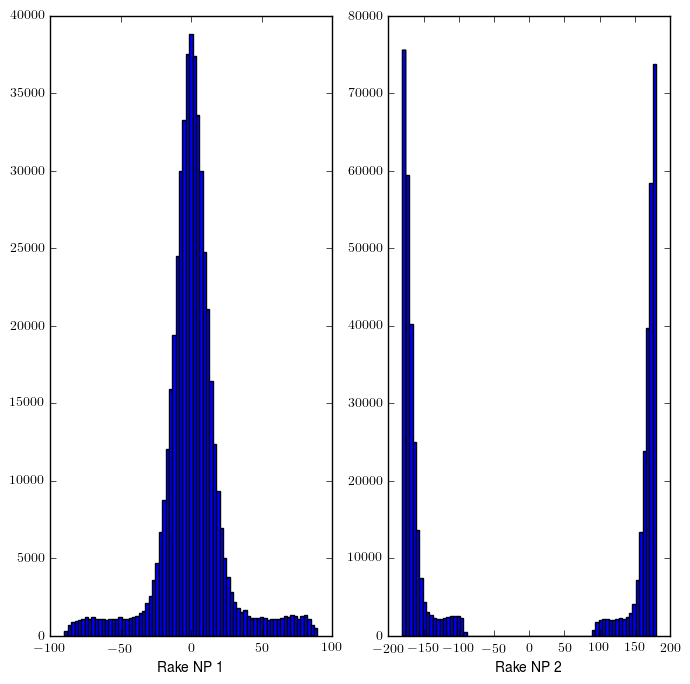

In [155]:
gs = gridspec.GridSpec(1,2)

plt.figure(figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

ax = plt.subplot(gs[0, 0])
ax.hist(rakes[rakes_np_1_idx, 0]*180/np.pi,  bins = binsize)
ax.set_xlabel('Rake NP 1')

ax1 = plt.subplot(gs[0, 1])
ax1.hist(rakes[rakes_np_2_idx, 1]*180/np.pi, bins = binsize)
ax1.set_xlabel('Rake NP 2')

plt.savefig('du20_2.pdf')

plt.show()

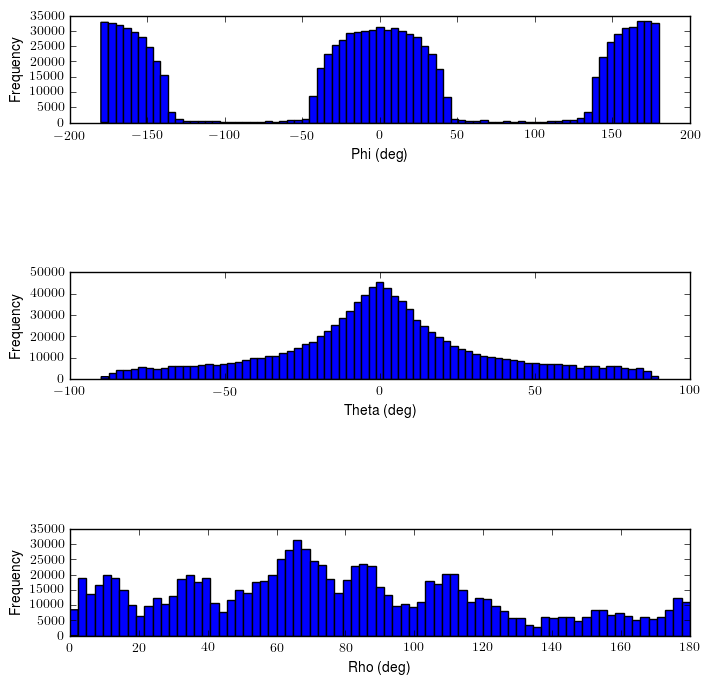

In [156]:
gs = gridspec.GridSpec(5, 1)
plt.figure(figsize=(8,8),  dpi=80, facecolor='w', edgecolor='k')
ax = plt.subplot(gs[0, 0])
ax.hist(phi_MCS*180/np.pi, bins = 75, edgecolor = 'black')
ax.set_xlabel('Phi (deg)')
ax.set_ylabel('Frequency')

ax = plt.subplot(gs[2, 0])
ax.hist(theta_MCS*180/np.pi, bins = 75, edgecolor = 'black')
ax.set_xlabel('Theta (deg)')
ax.set_ylabel('Frequency')

ax = plt.subplot(gs[4, 0])
ax.hist(rho_MCS*180/np.pi, bins = 75, edgecolor = 'black')
ax.set_xlabel('Rho (deg)')
ax.set_ylabel('Frequency')

plt.savefig('du20_3.pdf')

plt.show()

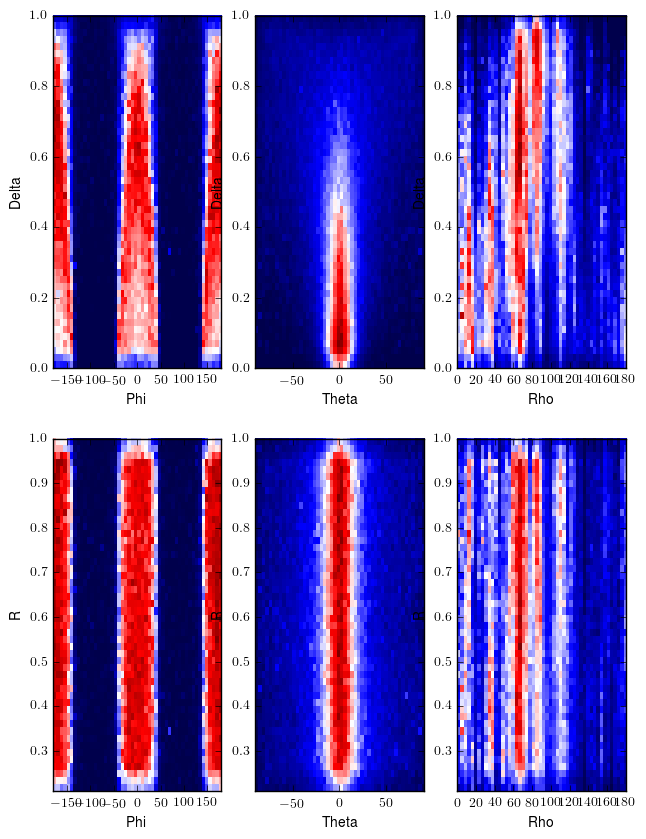

In [157]:
gs = gridspec.GridSpec(2, 4)

plt.figure(figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

ax = plt.subplot(gs[0, 0])
ax.hist2d(phi_MCS*180/np.pi, Delta, bins = 50, cmap = 'seismic')
ax.set_xlabel('Phi')
ax.set_ylabel('Delta')

ax1 = plt.subplot(gs[0, 1])
ax1.hist2d(theta_MCS*180/np.pi, Delta, bins = 50, cmap = 'seismic')
ax1.set_xlabel('Theta')
ax1.set_ylabel('Delta')

ax2 = plt.subplot(gs[0, 2])
ax2.hist2d(rho_MCS*180/np.pi, Delta, bins = 50, cmap = 'seismic')
ax2.set_xlabel('Rho')
ax2.set_ylabel('Delta')

ax = plt.subplot(gs[1, 0])
ax.hist2d(phi_MCS*180/np.pi, R, bins = 50, cmap = 'seismic')
ax.set_xlabel('Phi')
ax.set_ylabel('R')

ax1 = plt.subplot(gs[1, 1])
ax1.hist2d(theta_MCS*180/np.pi, R, bins = 50, cmap = 'seismic')
ax1.set_xlabel('Theta')
ax1.set_ylabel('R')

ax2 = plt.subplot(gs[1, 2])
ax2.hist2d(rho_MCS*180/np.pi, R, bins = 50, cmap = 'seismic')
ax2.set_xlabel('Rho')
ax2.set_ylabel('R')

plt.savefig('du20_4.pdf')

plt.show()

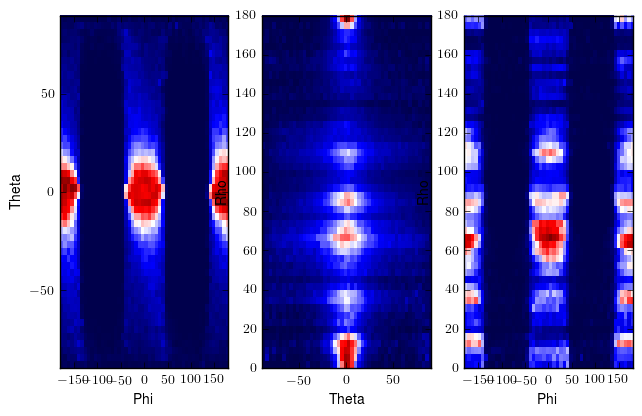

In [158]:
gs = gridspec.GridSpec(2, 4)

plt.figure(figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

ax = plt.subplot(gs[0, 0])
ax.hist2d(phi_MCS*180/np.pi, theta_MCS*180/np.pi , bins = 50, cmap = 'seismic')
ax.set_xlabel('Phi')
ax.set_ylabel('Theta')

ax1 = plt.subplot(gs[0, 1])
ax1.hist2d(theta_MCS*180/np.pi, rho_MCS*180/np.pi, bins = 50, cmap = 'seismic')
ax1.set_xlabel('Theta')
ax1.set_ylabel('Rho')

ax2 = plt.subplot(gs[0, 2])
ax2.hist2d(phi_MCS*180/np.pi, rho_MCS*180/np.pi, bins = 50, cmap = 'seismic')
ax2.set_xlabel('Phi')
ax2.set_ylabel('Rho')

plt.savefig('du20_5.pdf')


plt.show()

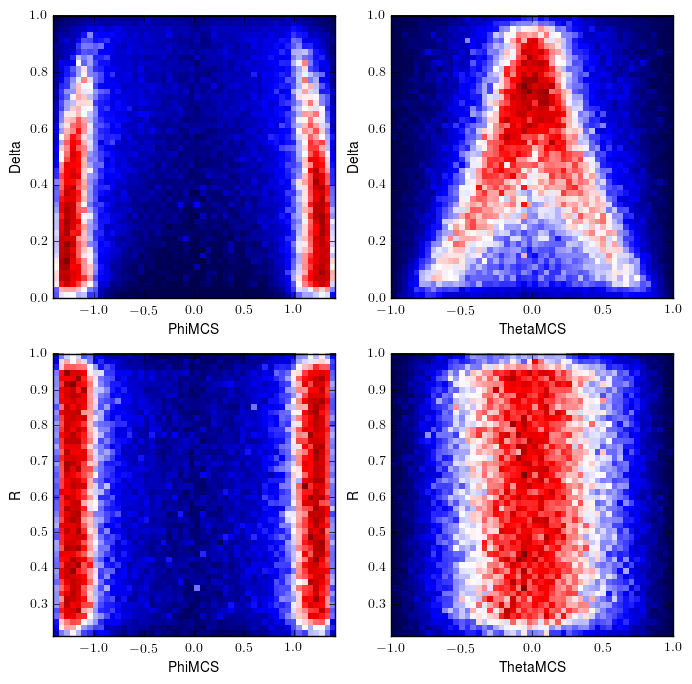

In [159]:
gs = gridspec.GridSpec(2,2)

plt.figure(figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

ax = plt.subplot(gs[0, 0])
ax.hist2d(phimcs, Delta, bins = 50, cmap = 'seismic')
ax.set_xlabel('PhiMCS')
ax.set_ylabel('Delta')

ax1 = plt.subplot(gs[0, 1])
ax1.hist2d(thetamcs, Delta, bins = 50, cmap = 'seismic')
ax1.set_xlabel('ThetaMCS')
ax1.set_ylabel('Delta')



ax = plt.subplot(gs[1, 0])
ax.hist2d(phimcs, R, bins = 50, cmap = 'seismic')
ax.set_xlabel('PhiMCS')
ax.set_ylabel('R')

ax1 = plt.subplot(gs[1, 1])
ax1.hist2d(thetamcs, R, bins = 50, cmap = 'seismic')
ax1.set_xlabel('ThetaMCS')
ax1.set_ylabel('R')

plt.savefig('du20_6.pdf')


plt.show()

In [160]:
kappa_est = stats.vonmises.fit(rakes[rakes_np_1_idx, 0], fscale=1)
kappa_est_rake_dist =  stats.vonmises.fit(distributed_dips[:, 1], fscale=1)
est_sigma = np.sqrt(-2*np.log(special.i1(kappa_est[0])/special.i0(kappa_est[0])))
sigma_post = np.std(rakes[rakes_np_1_idx, 0])
print(kappa_est)
print(kappa_est_rake_dist)

(7.1250889610448844, 0.0047294746508138525, 1)
(33.475231932855976, -0.00012176588940103944, 1)


In [161]:
est_sigma = np.sqrt(-2*np.log(special.i1(kappa_est[0])/special.i0(kappa_est[0])))
print(est_sigma*180/np.pi)
sigma_post = np.std(rakes[rakes_np_1_idx, 0])
print(sigma_post*180/np.pi)

22.3241432965
22.9599861336


In [1]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(rakes[rakes_np_1_idx, 0], normed=True, bins = 100, color = 'red', alpha = 0.5, label = 'Posterior')
ax.hist(distributed_dips[:, 0], bins = 100, edgecolor = 'none', alpha = 0.2, color = 'blue', normed=True, label = 'Predicted From Dip Distribution')
ax.hist(distributed_dips[:, 1], bins = 100, edgecolor = 'none', alpha = 0.4, color = 'green', normed=True, label = 'Rake Distribution')
ax.legend(loc = 0)
ax.set_xlabel('Rake (rad)')
ax.text(.5, 1.5, 'Posterior Kappa: {}' .format(kappa_est[0]))
ax.text(.5, 1.25, 'Posterior Sigma from Kappa: {}' .format(est_sigma*180/np.pi))
ax.text(.5, 1, 'Posterior Sigma: {}' .format(sigma_post*180/np.pi))
plt.savefig('du20_7.pdf')

plt.show()

NameError: name 'plt' is not defined

In [90]:
distributed_dips = np.array(pd.read_csv('VM_analysis_SS2_du20.txt', header=None))
kappa_est_rake_dist =  stats.vonmises.fit(distributed_dips[:, 0], fscale=1)

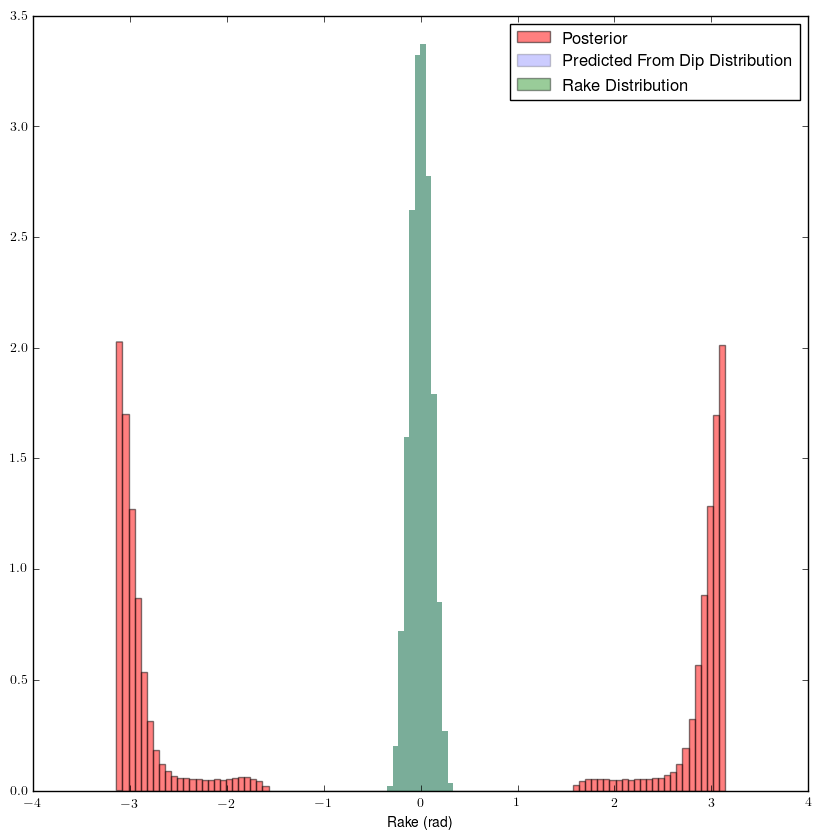

In [91]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)
ax.hist(rakes[rakes_np_2_idx, 1], normed=True, bins = 100, color = 'red', alpha = 0.5, label = 'Posterior')
ax.hist(distributed_dips[:, 0], bins = 100, edgecolor = 'none', alpha = 0.2, color = 'blue', normed=True, label = 'Predicted From Dip Distribution')
ax.hist(distributed_dips[:, 0], bins = 100, edgecolor = 'none', alpha = 0.4, color = 'green', normed=True, label = 'Rake Distribution')
ax.legend(loc = 0)
ax.set_xlabel('Rake (rad)')
plt.show()


In [93]:
print(kappa_est_rake_dist)

(84.356199913435077, 6.4339136842418468e-05, 1)


In [105]:
84.35619991343507, 309.74025800292668

(84.35619991343508, 309.7402580029267)